In [120]:
from pathlib import Path

import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns


# Data load

In [121]:
exp_result = {}
base_dir = Path(str(os.getenv("EXPS_DIR")))

exp_names = base_dir.glob("*")
exp_names = [i.name for i in exp_names if ".DS_Store" not in str(i)]

for exp_name in exp_names:
    exp_dir = base_dir / exp_name
    eval_dir = exp_dir / "evals"

    all_eval_path = list(eval_dir.glob('*'))
    all_eval_path = sorted(all_eval_path, key = lambda p: int(p.name.split('.')[0]))

    exp_col = {}

    for eval_path in all_eval_path:
        with open(eval_path, 'r') as f:
            a = json.load(f)

        prog_name = a["sample"]["prog_name"]
        testcase_num = a["sample"]["testcase_num"]
        patchs_eval = a["patchs_eval"]

        pass_ratio = sum([i["pass_num"] for i in patchs_eval]) / (testcase_num * 3)

        exp_col[prog_name] = pass_ratio

    exp_result[exp_name] = exp_col

exp_result.keys()

dict_keys(['gpt35-python-with_location_v3', 'gpt4-python-basic', 'gemini-python-with_location_v3', 'gpt4-python-with_lib', 'gemini-python-with_location', 'gpt35-python-with_lib_v2', 'gpt35-python-with_location_v2', 'gpt35-python-with_step', 'gpt35-python-with_location', 'gemini-python-with_location_v2', 'claude-python-basic', 'gpt4-python-with_location', 'gemini-python-with_step_v2', 'gemini-python-with_lib_v2', 'gemini-python-with_step_v3', 'gpt4-python-with_lib_v2', 'gemini-python-with_step', 'gemini-python-with_lib', 'gpt4-python-with_lib_v3', 'gpt35-python-basic', 'gpt35-python-with_lib', 'gpt4-python-basic_v2', 'gemini-python-basic'])

In [122]:
from quixbugs import QuixBugsDataset
from collections import Counter

prog_info = QuixBugsDataset("python").prog_info

bug_type_dict = {}
bug_consequence_dict = {}
bug_impact_dict = {}
for prog in prog_info:
    prog_name = prog["prog_name"]

    bug_type = prog["bug_type"]
    # if bug_type == ""
    bug_type_dict[prog_name] = bug_type

    bug_consequence_dict[prog_name] = prog["bug_consequence"]
    bug_impact_dict[prog_name] = prog["bug_impact"]


bug_type_df = {}

exp_counters = {}
for exp_name, exp_info in exp_result.items():
    bug_type_counter = Counter()
    bug_consequence_counter = Counter()
    bug_impact_counter = Counter()

    for prog_name, correct_ratio in exp_info.items():
        bug_type = bug_type_dict[prog_name]
        bug_consequence = bug_consequence_dict[prog_name]
        bug_impact = bug_impact_dict[prog_name]

        bug_type_counter[bug_type] += correct_ratio
        bug_consequence_counter[bug_consequence] += correct_ratio
        bug_impact_counter[bug_impact] += correct_ratio

    exp_counters[exp_name] = {
        "bug_type": bug_type_counter,
        "bug_consequence": bug_consequence_counter,
        "bug_impact": bug_impact_counter,
    }
    bug_type_df[exp_name] = bug_type_counter

exp_counters

{'gpt35-python-with_location_v3': {'bug_type': Counter({'variable assign fault': 8.965079365079363,
           'condition fault': 7.904761904761905,
           'indexing fault': 4.637037037037037,
           'variable misuse fault': 3.6666666666666665,
           'variable assign missing fault': 2.0,
           'condition missing fault': 1.7,
           'function misuse fault': 1.3333333333333333,
           'operator fault': 1.0,
           'record missing fault': 0.8}),
  'bug_consequence': Counter({'output error': 19.725925925925928,
           'infinite loop error': 7.038095238095237,
           'runtime error': 3.576190476190476,
           '格式錯誤': 1.6666666666666665}),
  'bug_impact': Counter({'base-case impact': 19.502116402116403,
           'edge-case impact': 7.504761904761904,
           'all-case impact': 5.0})},
 'gpt4-python-basic': {'bug_type': Counter({'variable assign fault': 9.886507936507936,
           'condition fault': 7.8,
           'indexing fault': 5.555555555

# Data checking

In [123]:
exp_df = pd.DataFrame.from_dict(exp_result)

exp_df = exp_df.reindex(sorted(exp_df.columns), axis=1)

exp_df

,claude-python-basic,gemini-python-basic,gemini-python-with_lib,gemini-python-with_lib_v2,gemini-python-with_location,gemini-python-with_location_v2,gemini-python-with_location_v3,gemini-python-with_step,gemini-python-with_step_v2,gemini-python-with_step_v3,...,gpt35-python-with_location,gpt35-python-with_location_v2,gpt35-python-with_location_v3,gpt35-python-with_step,gpt4-python-basic,gpt4-python-basic_v2,gpt4-python-with_lib,gpt4-python-with_lib_v2,gpt4-python-with_lib_v3,gpt4-python-with_location
bitcount,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.370370,0.666667,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
breadth_first_search,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.000000,0.600000,0.000000,0.866667,...,1.000000,1.000000,1.000000,0.800000,0.800000,1.000000,0.666667,1.000000,1.000000,1.000000
bucketsort,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.714286,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
depth_first_search,0.666667,0.933333,0.600000,1.000000,1.000000,0.466667,0.200000,0.533333,0.733333,0.400000,...,1.000000,0.066667,0.800000,0.800000,0.733333,1.000000,0.466667,0.200000,0.466667,1.000000
detect_cycle,1.000000,1.000000,0.944444,0.944444,1.000000,0.277778,0.555556,0.888889,0.777778,0.944444,...,1.000000,0.277778,1.000000,0.277778,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
find_first_in_sorted,0.857143,0.952381,1.000000,1.000000,1.000000,1.000000,0.857143,0.523810,0.619048,0.761905,...,1.000000,1.000000,0.904762,0.809524,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
find_in_sorted,1.000000,1.000000,1.000000,0.952381,1.000000,1.000000,0.666667,0.904762,0.904762,0.809524,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
flatten,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
gcd,0.666667,1.000000,1.000000,1.000000,1.000000,0.666667,0.722222,0.500000,0.555556,0.555556,...,1.000000,1.000000,1.000000,0.722222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
get_factors,0.636364,0.060606,0.090909,0.333333,1.000000,0.666667,0.666667,0.121212,0.696970,0.666667,...,1.000000,1.000000,1.000000,0.484848,1.000000,1.000000,1.000000,0.545455,1.000000,1.000000


In [124]:
bug_type_counter = exp_df["gemini-python-basic"]
bug_type_counter[bug_type_counter == 1]


bitcount                      1.0
breadth_first_search          1.0
bucketsort                    1.0
detect_cycle                  1.0
find_in_sorted                1.0
flatten                       1.0
gcd                           1.0
hanoi                         1.0
is_valid_parenthesization     1.0
longest_common_subsequence    1.0
mergesort                     1.0
next_permutation              1.0
pascal                        1.0
powerset                      1.0
shortest_paths                1.0
shunting_yard                 1.0
sieve                         1.0
sqrt                          1.0
to_base                       1.0
Name: gemini-python-basic, dtype: float64

In [125]:
df_count = exp_df[exp_df > 0].count()

df_count


claude-python-basic               38
gemini-python-basic               38
gemini-python-with_lib            40
gemini-python-with_lib_v2         39
gemini-python-with_location       39
gemini-python-with_location_v2    38
gemini-python-with_location_v3    34
gemini-python-with_step           36
gemini-python-with_step_v2        37
gemini-python-with_step_v3        40
gpt35-python-basic                39
gpt35-python-with_lib             38
gpt35-python-with_lib_v2          39
gpt35-python-with_location        40
gpt35-python-with_location_v2     40
gpt35-python-with_location_v3     40
gpt35-python-with_step            40
gpt4-python-basic                 38
gpt4-python-basic_v2              39
gpt4-python-with_lib              39
gpt4-python-with_lib_v2           39
gpt4-python-with_lib_v3           39
gpt4-python-with_location         39
dtype: int64

In [126]:
df_sum = exp_df.sum()

df_sum

claude-python-basic               31.303030
gemini-python-basic               29.675156
gemini-python-with_lib            29.361544
gemini-python-with_lib_v2         33.580576
gemini-python-with_location       35.673016
gemini-python-with_location_v2    22.250132
gemini-python-with_location_v3    20.519882
gemini-python-with_step           18.179525
gemini-python-with_step_v2        20.641546
gemini-python-with_step_v3        21.158374
gpt35-python-basic                36.060245
gpt35-python-with_lib             33.601103
gpt35-python-with_lib_v2          37.032828
gpt35-python-with_location        37.849206
gpt35-python-with_location_v2     30.854365
gpt35-python-with_location_v3     32.006878
gpt35-python-with_step            28.309055
gpt4-python-basic                 34.308730
gpt4-python-basic_v2              35.836508
gpt4-python-with_lib              33.022527
gpt4-python-with_lib_v2           34.822439
gpt4-python-with_lib_v3           35.814286
gpt4-python-with_location       

# Ploting

<Axes: >

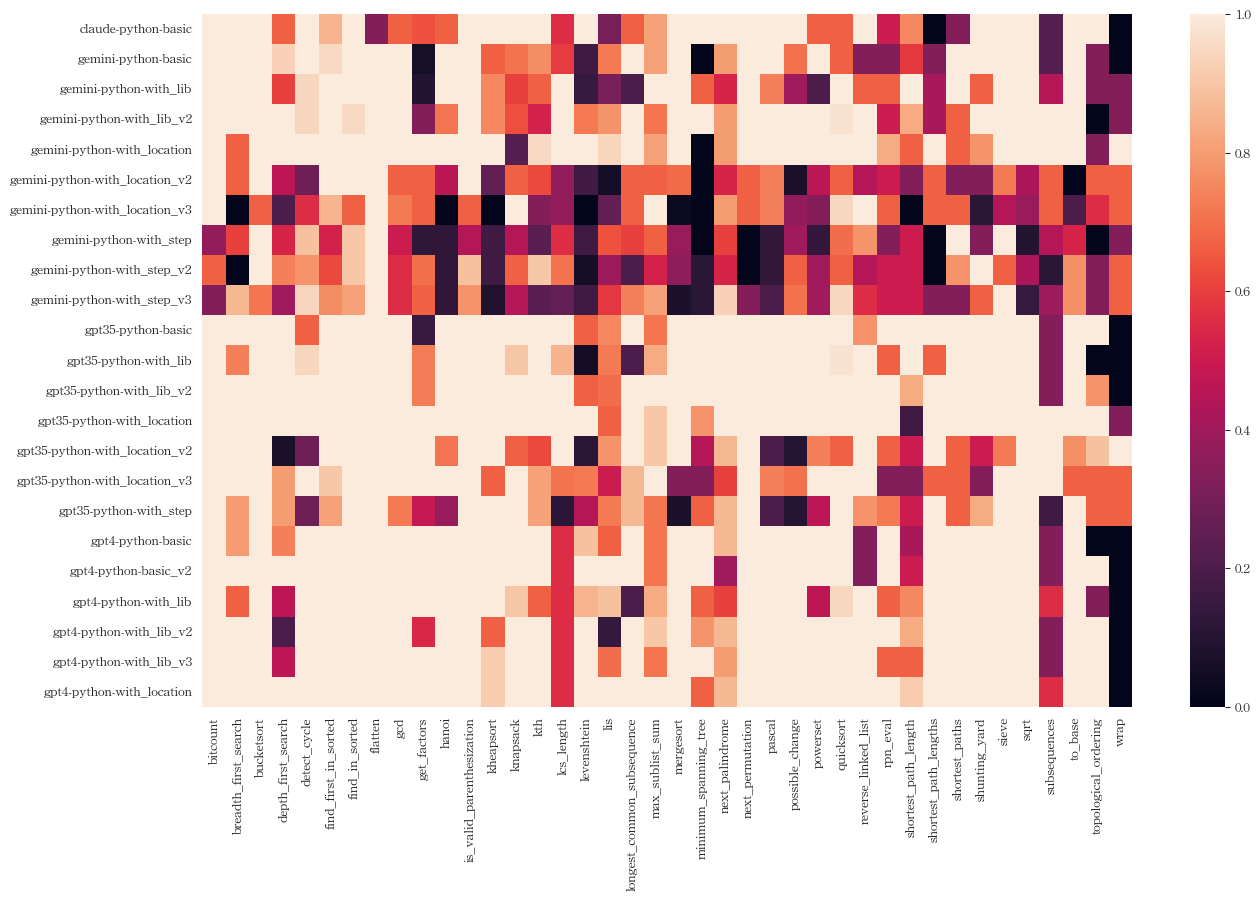

In [131]:

fig, ax = plt.subplots(figsize=(15, 9))

sns.heatmap(exp_df.transpose(), xticklabels=True, yticklabels=True,)


## Overview of all testing

<Axes: >

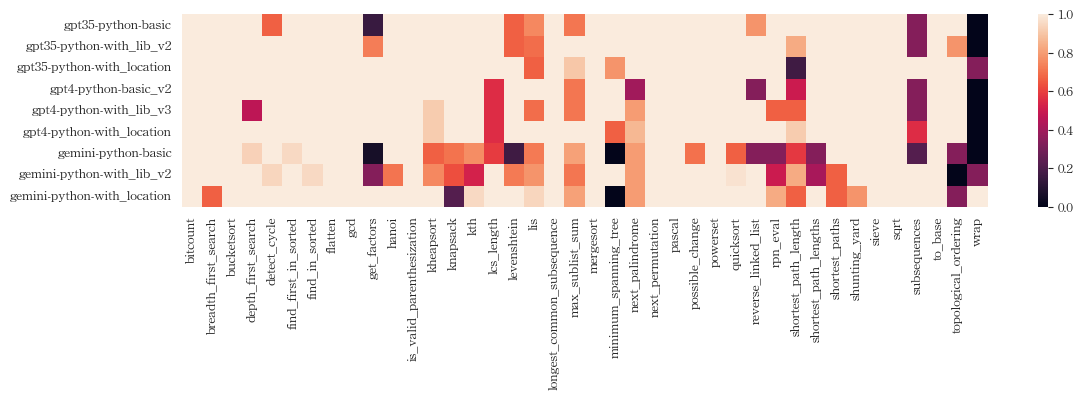

In [128]:

filtered_exp_names = [
    "gpt35-python-basic",
    "gpt35-python-with_lib_v2",
    "gpt35-python-with_location",
    "gpt4-python-basic_v2",
    "gpt4-python-with_lib_v3",
    "gpt4-python-with_location",
    "gemini-python-basic",
    "gemini-python-with_lib_v2",
    "gemini-python-with_location",
    # "claude-python-basic",
]

fig, ax = plt.subplots(figsize=(13, 2.5))
sns.heatmap(exp_df[filtered_exp_names].transpose(), xticklabels=True, yticklabels=True,)


# Temp md file


In [129]:
exp_name = "gpt4-python-with_location"
patch_dir = base_dir / exp_name / "patchs"

patch_files = sorted(patch_dir.glob("*.json"), key=lambda s: int(s.name.split(".")[0]))

with open("temp.md", "w") as f:
    f.write(f"# {exp_name}\n\n")

    for patch_file in patch_files:
        with open(patch_file) as jf:
            json_content = json.load(jf)

        patches = json_content["patches"]
        sample = json_content["prompt"]["sample"]

        prog_id = sample["prog_id"]
        prog_name = sample["prog_name"]
        bug_detail_desc = sample["bug_detail_desc"]

        text = (
            f"## {prog_id}.{prog_name}\n"
            "\n"
            f"Bug detail: {bug_detail_desc}\n"
            "\n"
            "### Patchs\n"
            "#### Patch 0\n"
            f"{patches[0]['raw_code']}\n"
            "#### Patch 1\n"
            f"{patches[1]['raw_code']}\n"
            "#### Patch 2\n"
            f"{patches[2]['raw_code']}\n"
        )

        f.write(text)